In [1]:
#import the libaries to work with
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("expenses.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [9]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [13]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
df[(df.sex =='male') & (df.smoker == 'yes')].value_counts()

age  sex   bmi     children  smoker  region     charges    
18   male  17.290  2         yes     northeast  12829.45510    1
47   male  29.800  3         yes     southwest  25309.48900    1
45   male  22.895  2         yes     northwest  21098.55405    1
           30.360  0         yes     southeast  62592.87309    1
           36.480  2         yes     northwest  42760.50220    1
                                                              ..
30   male  37.800  2         yes     southwest  39241.44200    1
31   male  25.900  3         yes     southwest  19199.94400    1
           29.810  0         yes     southeast  19350.36890    1
           34.390  3         yes     northwest  38746.35510    1
64   male  36.960  2         yes     southeast  49577.66240    1
Length: 159, dtype: int64

In [15]:
df.groupby(['sex', 'smoker', 'region'])['region'].count()

sex     smoker  region   
female  no      northeast    132
                northwest    135
                southeast    139
                southwest    141
        yes     northeast     29
                northwest     29
                southeast     36
                southwest     21
male    no      northeast    125
                northwest    132
                southeast    134
                southwest    126
        yes     northeast     38
                northwest     29
                southeast     55
                southwest     37
Name: region, dtype: int64

In [16]:
df.groupby(['children', 'region'])['region'].count()

children  region   
0         northeast    147
          northwest    132
          southeast    157
          southwest    138
1         northeast     77
          northwest     74
          southeast     95
          southwest     78
2         northeast     51
          northwest     66
          southeast     66
          southwest     57
3         northeast     39
          northwest     46
          southeast     35
          southwest     37
4         northeast      7
          northwest      6
          southeast      5
          southwest      7
5         northeast      3
          northwest      1
          southeast      6
          southwest      8
Name: region, dtype: int64

In [17]:
df.groupby(['sex', 'smoker'])['smoker'].count()

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: smoker, dtype: int64

In [18]:
df.groupby(['sex', 'region'])['region'].count()

sex     region   
female  northeast    161
        northwest    164
        southeast    175
        southwest    162
male    northeast    163
        northwest    161
        southeast    189
        southwest    163
Name: region, dtype: int64

In [19]:
df.groupby(['region'])['charges'].sum()

#Note - The Insurance Company incurs more expenses in the Southeast region.

region
northeast    4.343669e+06
northwest    4.035712e+06
southeast    5.363690e+06
southwest    4.012755e+06
Name: charges, dtype: float64

In [20]:
df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [47]:
age_range = []
for row in df['age']:
        if row <=  28 :
            age_range.append('Youth')
        elif row <= 38:
            age_range.append('Young Adult')
        elif row <= 48:
            age_range.append('Adult')
        elif row <= 58:
            age_range.append('Mid-Life')
        else :
            age_range.append('Elder')
df['age_range'] = age_range

In [48]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,Youth
1,18,male,33.770,1,no,southeast,1725.55230,Youth
2,28,male,33.000,3,no,southeast,4449.46200,Youth
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult


In [29]:
df.groupby(['sex', 'smoker', 'age_range'])['age_range'].count()

sex     smoker  age_range  
female  no      Adult          109
                Elder           56
                Mid-Life       124
                Young Adult    104
                Youth          154
        yes     Adult           29
                Elder           15
                Mid-Life        14
                Young Adult     23
                Youth           34
male    no      Adult          103
                Elder           52
                Mid-Life       109
                Young Adult     97
                Youth          156
        yes     Adult           35
                Elder           16
                Mid-Life        27
                Young Adult     35
                Youth           46
Name: age_range, dtype: int64

In [30]:
df.groupby(['age_range', 'sex'])['charges'].sum()

age_range    sex   
Adult        female    1.886071e+06
             male      2.070274e+06
Elder        female    1.441249e+06
             male      1.453422e+06
Mid-Life     female    2.071209e+06
             male      2.282091e+06
Young Adult  female    1.297333e+06
             male      1.706693e+06
Youth        female    1.625199e+06
             male      1.922284e+06
Name: charges, dtype: float64

In [31]:
df.groupby(['age_range'])['charges'].sum()

age_range
Adult          3.956346e+06
Elder          2.894671e+06
Mid-Life       4.353299e+06
Young Adult    3.004026e+06
Youth          3.547483e+06
Name: charges, dtype: float64

In [32]:
df.groupby(['smoker', 'age_range'])['age_range'].count()

smoker  age_range  
no      Adult          212
        Elder          108
        Mid-Life       233
        Young Adult    201
        Youth          310
yes     Adult           64
        Elder           31
        Mid-Life        41
        Young Adult     58
        Youth           80
Name: age_range, dtype: int64

In [33]:
df.groupby(['sex'])['charges'].sum()

sex
female    8.321061e+06
male      9.434764e+06
Name: charges, dtype: float64

### Univariate Analysis

<AxesSubplot:>

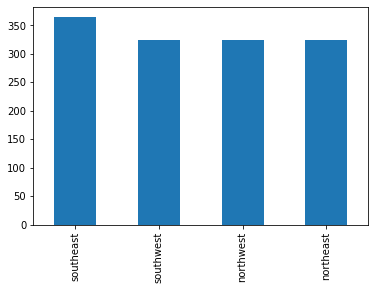

In [36]:
df.region.value_counts().plot.bar()

<AxesSubplot:ylabel='region'>

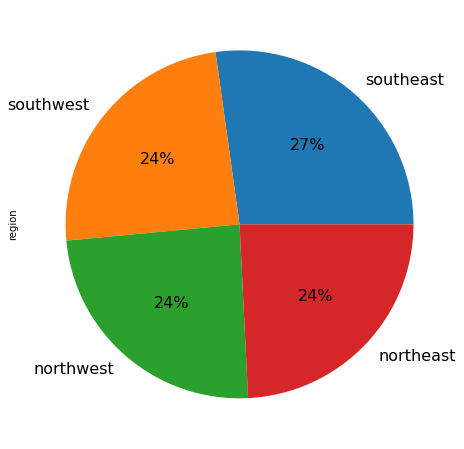

In [67]:
df.region.value_counts().plot(kind='pie', y='region', figsize = (10,8), fontsize = 16, autopct='%1.0f%%')

<AxesSubplot:>

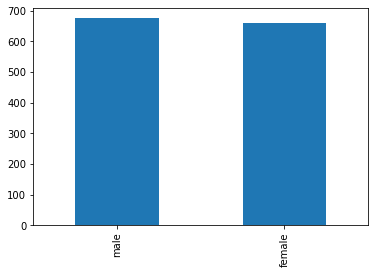

In [45]:
df.sex.value_counts().plot.bar()

<AxesSubplot:ylabel='sex'>

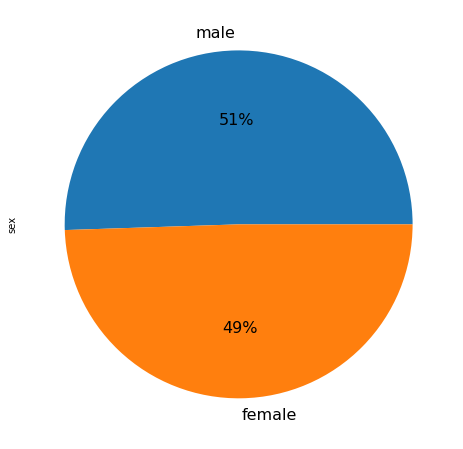

In [52]:
df.sex.value_counts().plot(kind='pie', y = 'sex', figsize = (10,8), fontsize = 16, autopct='%1.0f%%')

<AxesSubplot:>

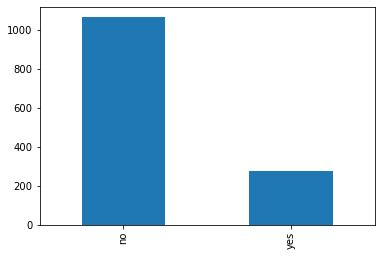

In [49]:
df.smoker.value_counts().plot.bar()

<AxesSubplot:ylabel='smoker'>

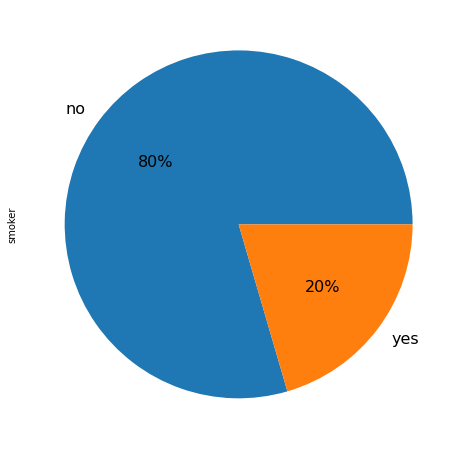

In [53]:
df.smoker.value_counts().plot(kind='pie', y = 'smoker', figsize = (10,8), fontsize = 16, autopct='%1.0f%%')

<AxesSubplot:>

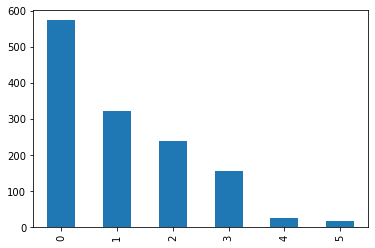

In [55]:
df.children.value_counts().plot.bar()

<AxesSubplot:ylabel='children'>

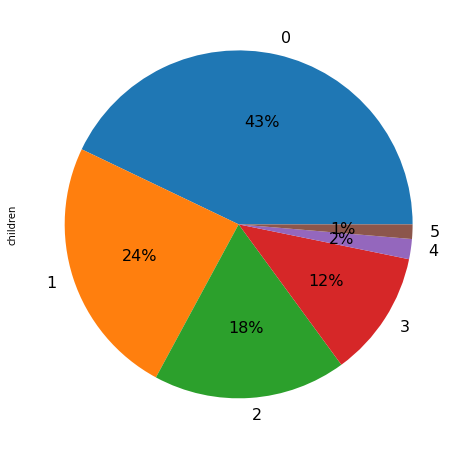

In [56]:
df.children.value_counts().plot(kind='pie', y = 'children', figsize = (10,8), fontsize = 16, autopct='%1.0f%%')

<AxesSubplot:>

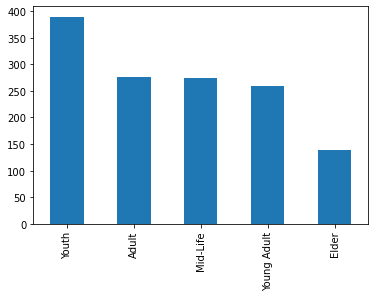

In [57]:
df.age_range.value_counts().plot.bar()

<AxesSubplot:ylabel='age_range'>

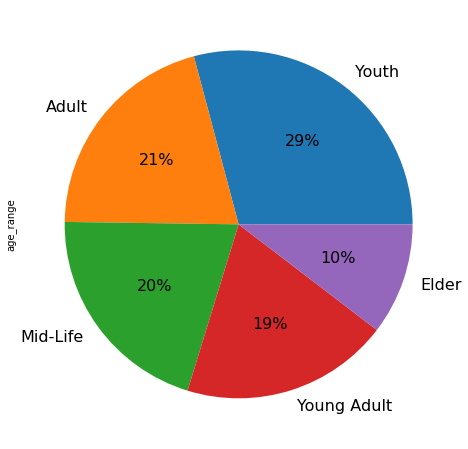

In [58]:
df.age_range.value_counts().plot(kind='pie', y = 'age_range', figsize = (10,8), fontsize = 16, autopct='%1.0f%%')

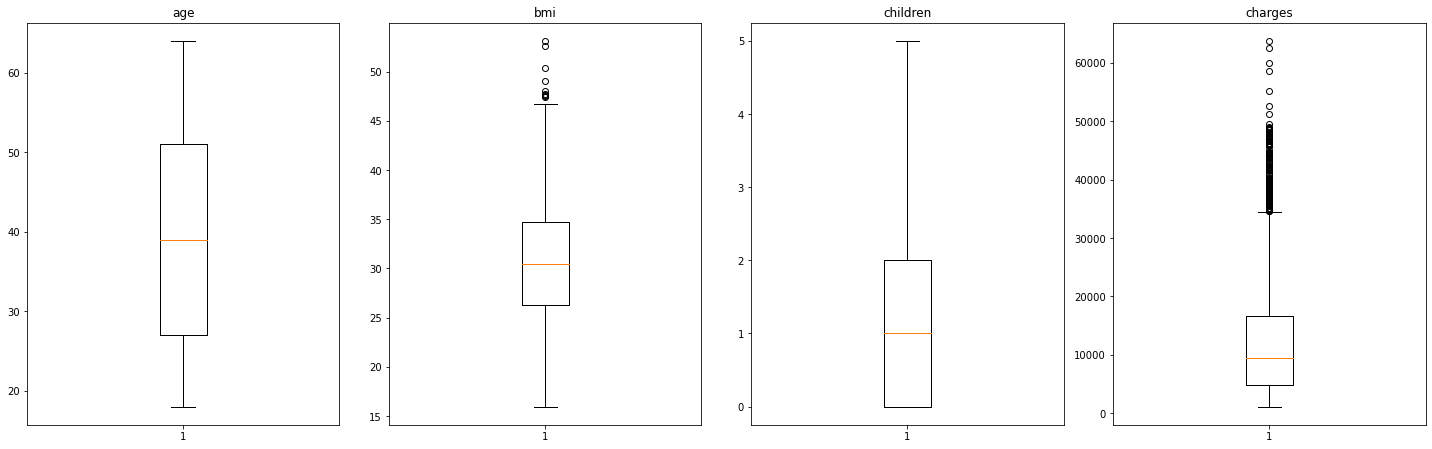

In [61]:
# outlier detection using boxplot
#Create box plots for features with numeric data 

numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

### Multivariate Analysis

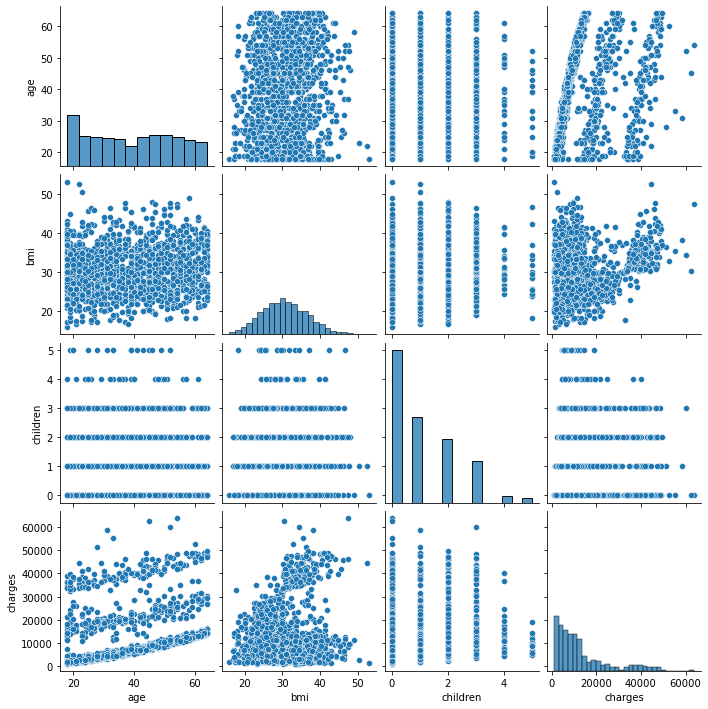

In [66]:
sns.pairplot(data = df)

<AxesSubplot:>

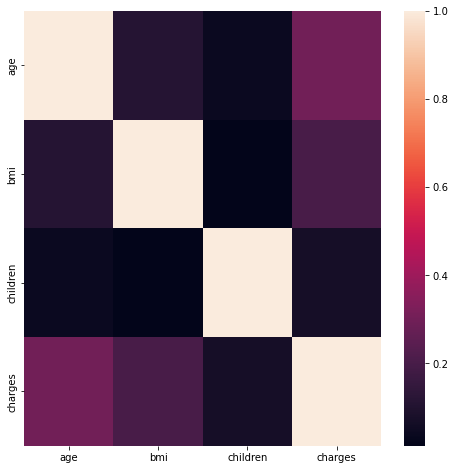

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

In [8]:
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot


C:\Users\Abimbola\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


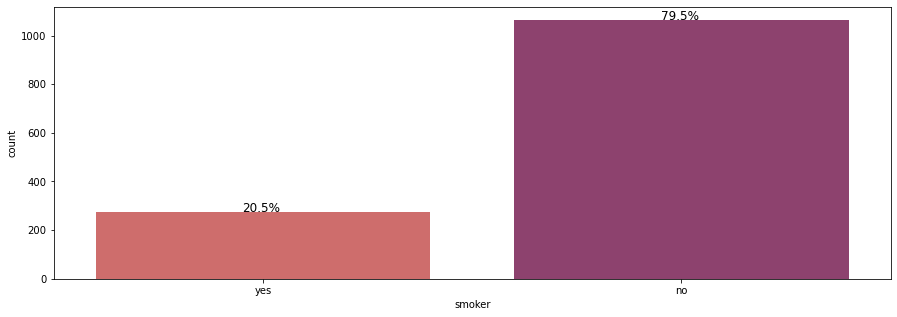

In [17]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["smoker"],palette='flare') #or pastel,winter etc
perc_on_bar(ax,df["smoker"])

C:\Users\Abimbola\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


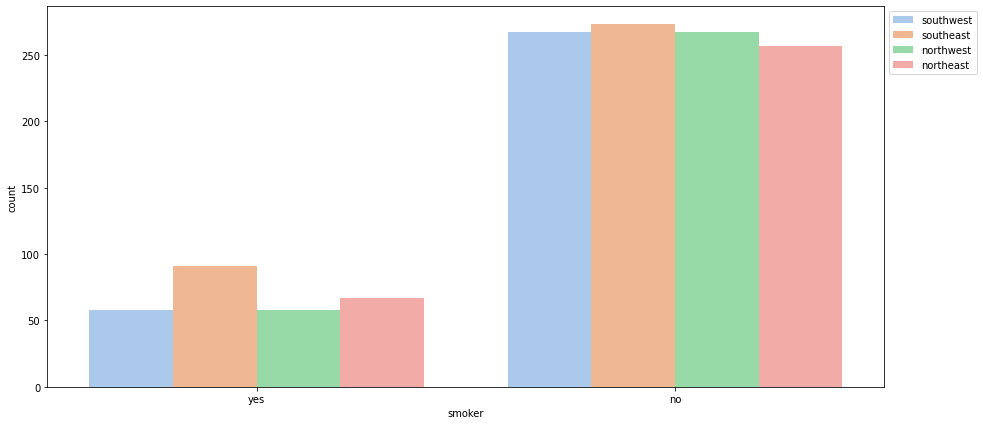

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(df["smoker"],hue=df["region"],palette='pastel')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

C:\Users\Abimbola\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


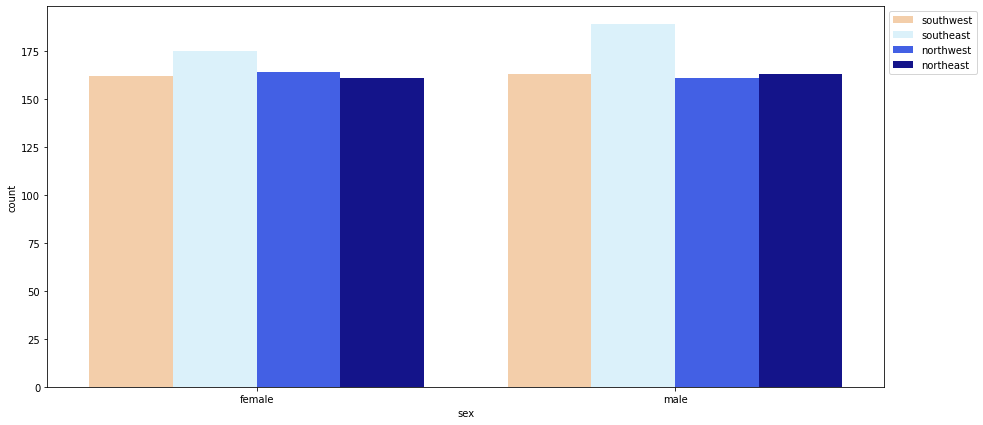

In [45]:
plt.figure(figsize=(15,7))
sns.countplot(df["sex"],hue=df["region"],palette='flag')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

C:\Users\Abimbola\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


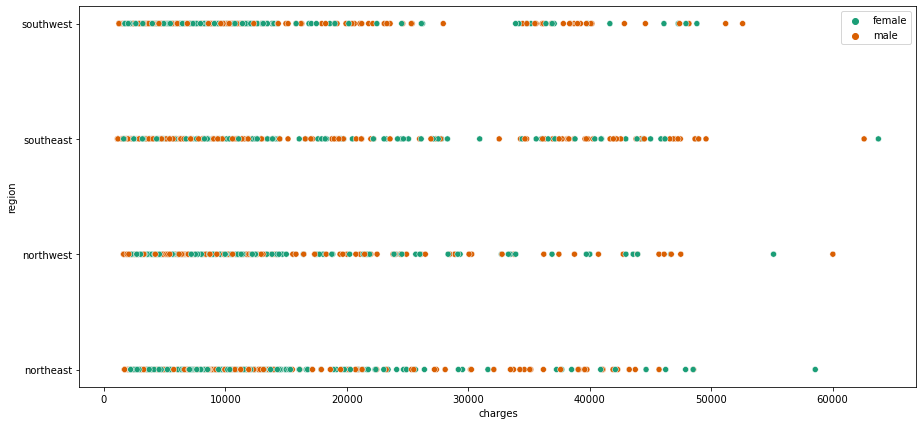

In [27]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["charges"],df["region"],hue=df["sex"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

C:\Users\Abimbola\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


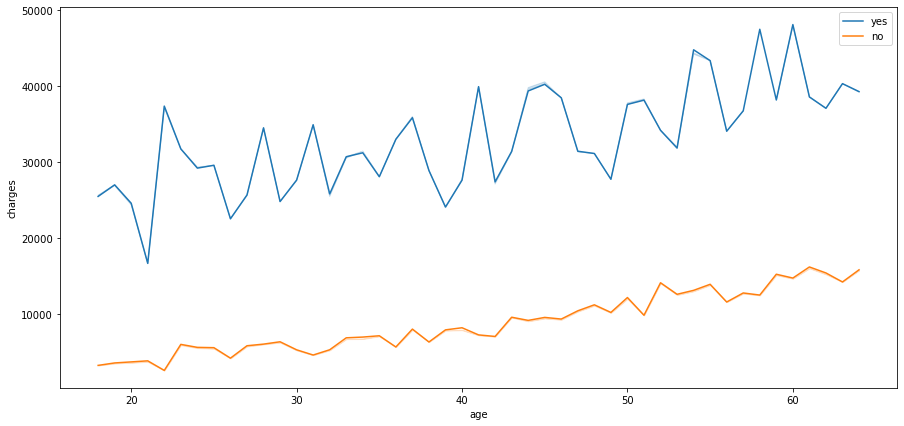

In [40]:
plt.figure(figsize=(15,7))
sns.lineplot(df["age"],df["charges"],hue=df["smoker"],ci=2)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

C:\Users\Abimbola\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


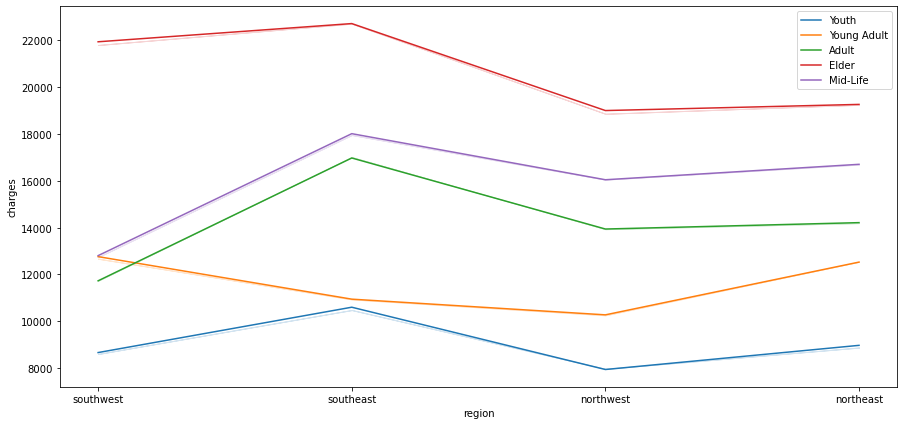

In [49]:
plt.figure(figsize=(15,7))
sns.lineplot(df["region"],df["charges"],hue=df["age_range"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

C:\Users\Abimbola\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


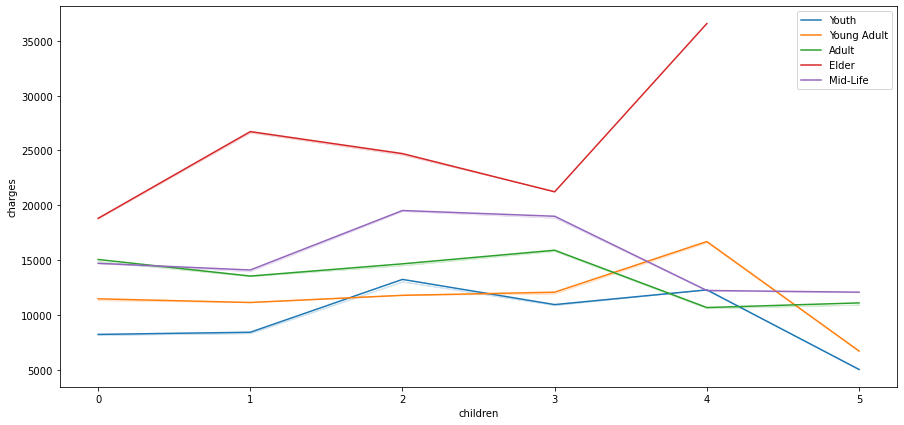

In [50]:
plt.figure(figsize=(15,7))
sns.lineplot(df["children"],df["charges"],hue=df["age_range"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

<AxesSubplot:xlabel='age_range,sex'>

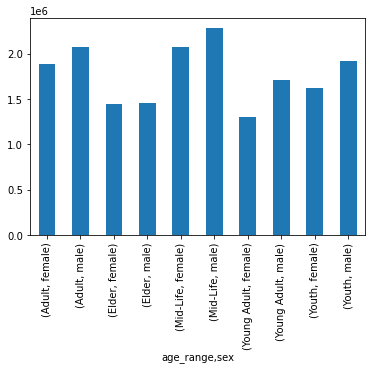

In [51]:
df.groupby(['age_range', 'sex'])['charges'].sum().plot.bar()

<AxesSubplot:ylabel='charges'>

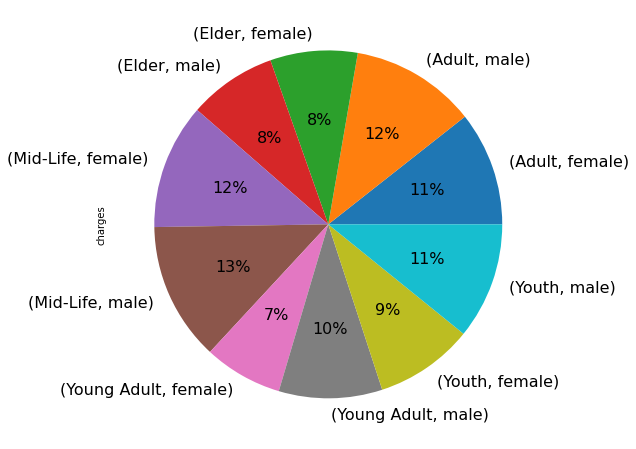

In [54]:
df.groupby(['age_range', 'sex'])['charges'].sum().plot(kind='pie', y = 'age_range', figsize = (10,8), fontsize = 16, autopct='%1.0f%%')

<AxesSubplot:ylabel='charges'>

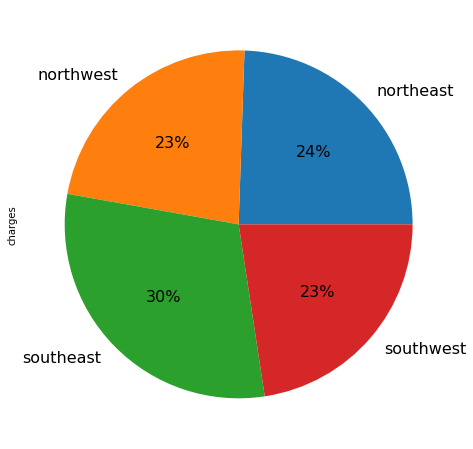

In [55]:
df.groupby(['region'])['charges'].sum().plot(kind='pie', y = 'region', figsize = (10,8), fontsize = 16, autopct='%1.0f%%')

<AxesSubplot:xlabel='region'>

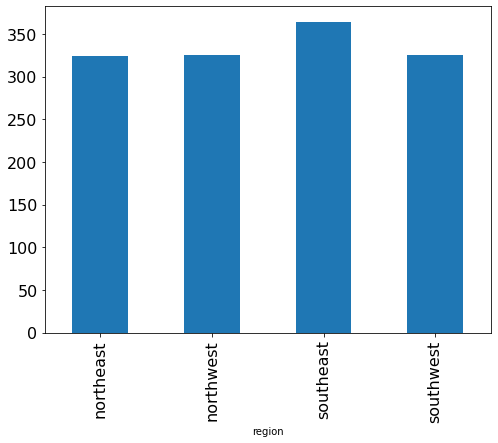

In [58]:
df.groupby(['region'])['region'].count().plot(kind='bar', y = 'region', figsize = (8,6), fontsize = 16)

<AxesSubplot:>

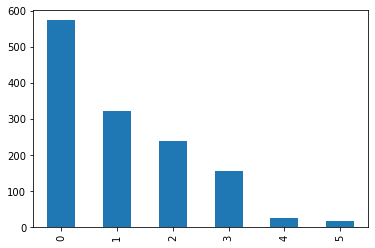

In [60]:
df.children.value_counts().plot.bar()